In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
data = pd.read_csv("ELISA.csv")

In [6]:
concentrations = ["80","40","20","10","5","2.5","1.25","0.63","0.31","0.16","0.078","0.039", "0"]

In [46]:
def growthPlot(name, title, letter, ctrl):
    savename = f'{name}.pdf'
    fig, name = plt.subplots()
    
    i = 0
    for e in [(letter+'{}').format(i) for i in range(1,13)]+[ctrl]:
        name.plot(data["Time"], data[e],label=concentrations[i])
        i += 1

    name.set_title(title)
    name.set_xlabel("Tid [timer]")
    name.set_ylabel("Absorbans")
    plt.subplots_adjust(right=0.77)
    name.legend(loc=(1.04,0.1))
    plt.savefig(savename, dpi=150)
    
    plt.show()

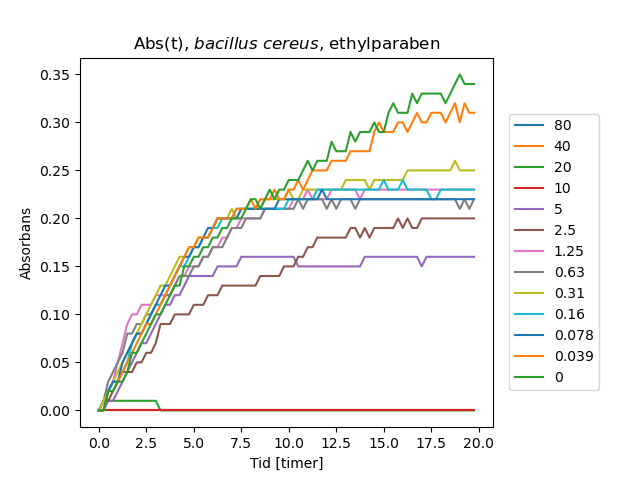

In [45]:
growthPlot('vækstbcethyl' ,"Abs(t), $\it{bacillus~cereus}$, ethylparaben", 'B', 'A11')

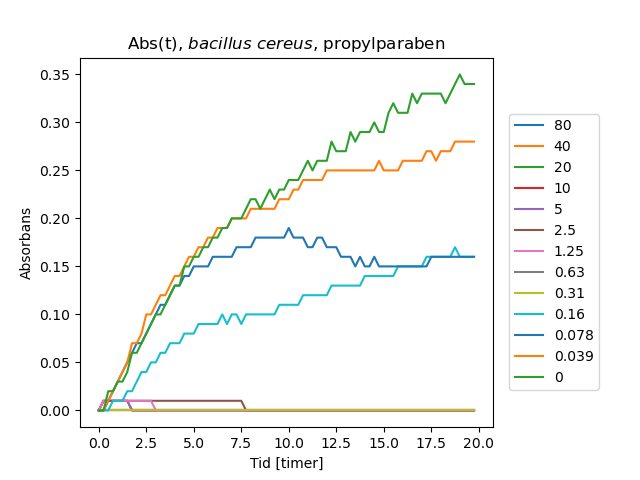

In [15]:
growthPlot('vækstbcpropyl' ,"Abs(t), $\it{bacillus~cereus}$, propylparaben", 'C', 'A11')

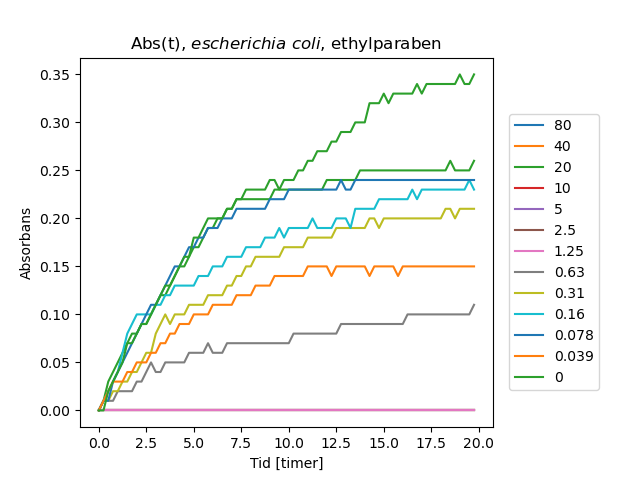

In [16]:
growthPlot('vækstecethyl' ,"Abs(t), $\it{escherichia~coli}$, ethylparaben", 'F', 'E10')

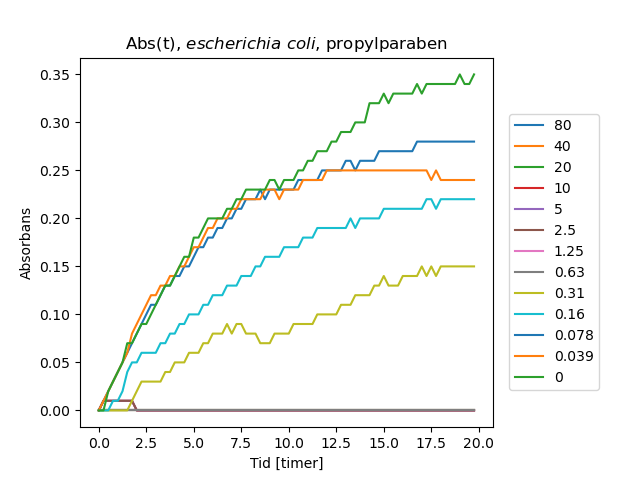

In [17]:
growthPlot('vækstecpropyl' ,"Abs(t), $\it{escherichia~coli}$, propylparaben", 'G', 'E10')

In [41]:
def micPlot(name, title, letter, ctrl, remove_index = []):
    x = list(map(float, concentrations))
    savename = f'{name}.pdf'
    fig, name = plt.subplots()

    y = data.loc[68,[(letter+'{}').format(i) for i in range(1,13)]+[ctrl]].values.tolist()
    if remove_index is not None:
        for e in remove_index:
            del x[e]
            del y[e]
        
    name.plot(x, y)

    name.set_title(title)
    name.set_xlabel("log(c)")
    name.set_ylabel("Absorbans(17t)")
    name.set_xscale("log")
    plt.savefig(savename, dpi=150)
    
    plt.show()

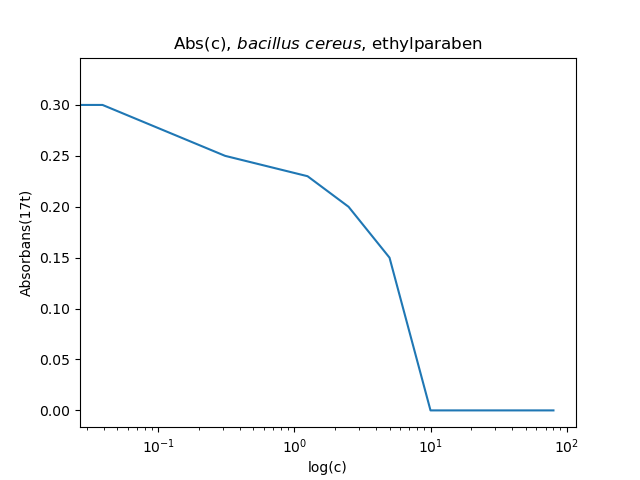

In [42]:
micPlot('micbcethyl', "Abs(c), $\it{bacillus~cereus}$, ethylparaben", 'B', 'A11', [10,9,7])

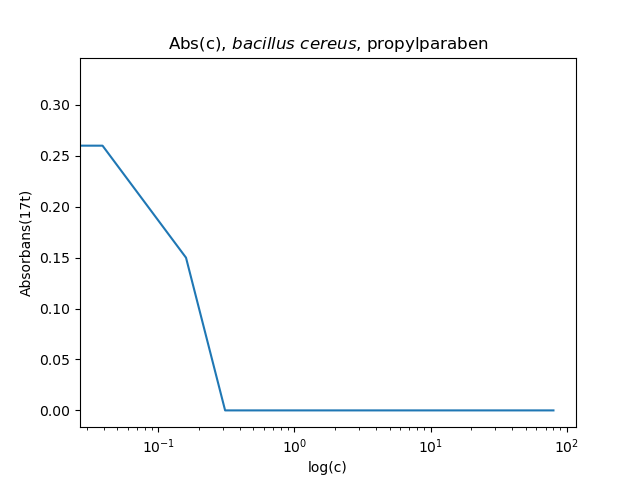

In [33]:
micPlot('micbcpropyl', "Abs(c), $\it{bacillus~cereus}$, propylparaben", 'C', 'A11', [10])

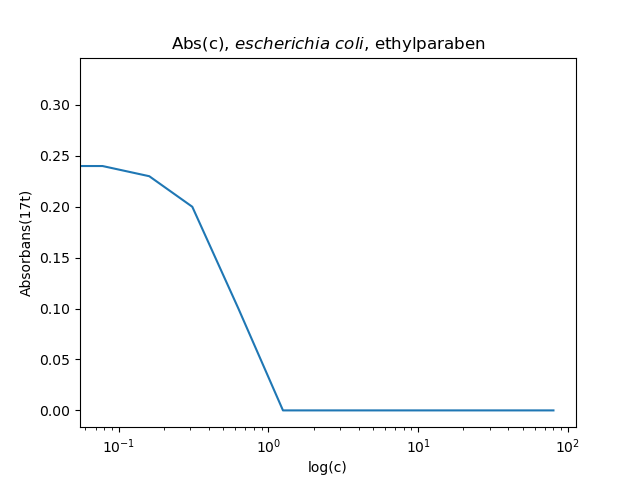

In [35]:
micPlot('micecethyl', "Abs(c), $\it{escherichia~coli}$, ethylparaben", 'F', 'E10', [11,2])

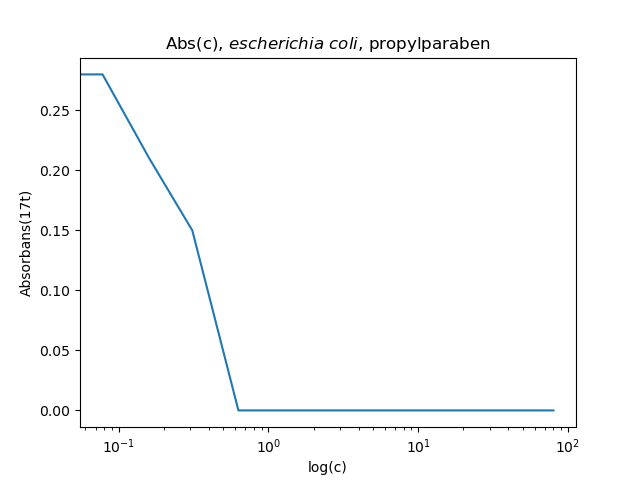

In [36]:
micPlot('micecpropyl', "Abs(c), $\it{escherichia~coli}$, propylparaben", 'G', 'E11', [11])